In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [ ]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [ ]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [ ]:
labels = np.reshape(breast_labels,(569,1))

In [ ]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [ ]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
breast_dataset.shape

(569, 31)

In [ ]:
X = breast_dataset.values[:,0:30]
print('X =', X[0:5])

X = [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2

In [ ]:
Y = breast_dataset.values[:,30]
print('Y =', Y[0:5])

Y = [0. 0. 0. 0. 0.]


In [ ]:
# Splitting the datasets to training and validation sets.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [ ]:
# Feature scaling between 0 and 1 for independent variables using Standardization.

from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = MinMaxScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.fit_transform(X_test)

In [ ]:
print('New X_train =', X_train_sc[0:5])

New X_train = [[0.1452506  0.32448133 0.14249188 0.07096501 0.52210275 0.18450791
  0.05883318 0.08822068 0.41919192 0.28117102 0.05446315 0.36571782
  0.04810818 0.01798599 0.28172272 0.09191276 0.04267677 0.1523584
  0.2448393  0.06506087 0.11490573 0.39498934 0.10742567 0.04885961
  0.45585419 0.10954585 0.08426518 0.22387186 0.26197516 0.14167651]
 [0.18074684 0.50912863 0.17275931 0.09179215 0.38427284 0.13029929
  0.08467666 0.06978131 0.48282828 0.20661331 0.07104834 0.27864215
  0.06987702 0.024248   0.22343526 0.14441073 0.0755303  0.19795416
  0.19705849 0.06202065 0.17182497 0.53358209 0.16574531 0.07478864
  0.39047745 0.13806987 0.15391374 0.25783672 0.27597083 0.14154532]
 [0.43348005 0.21369295 0.41814664 0.27847296 0.45965027 0.22474488
  0.12886598 0.2250497  0.34090909 0.18513058 0.04606192 0.06121818
  0.04579937 0.02729489 0.10385345 0.07666657 0.04623737 0.16569426
  0.13285304 0.02508879 0.34791889 0.20149254 0.32616166 0.18745085
  0.32642145 0.14059241 0.1845047

In [ ]:
# Construct a confusion matrix
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= test_size, random_state = seed)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train_sc, Y_train)
predicted = model.predict(X_test_sc)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[47  0]
 [ 9 58]]


In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= test_size, random_state = seed)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train_sc, Y_train)
predicted = model.predict(X_test_sc)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        47
         1.0       1.00      0.87      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



Text(0.5, 257.44, 'Predicted label')

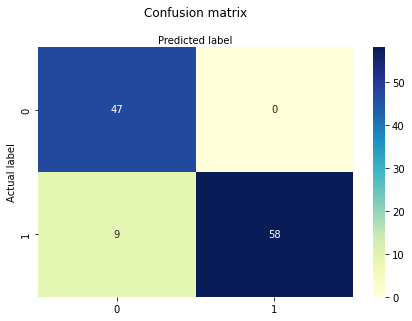

In [ ]:
# Visualize the confusion matrix using Heatmap
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names=[0,1] # name of classes
fid, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
C = [100, 50, 30, 10, 1]

for c in C:
    clf = LogisticRegression(penalty = 'l1', C=c, solver = 'liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train_sc, Y_train))
    print('Test accuracy:', clf.score(X_test_sc, Y_test))
    print('')

C: 100
Training accuracy: 0.7274725274725274
Test accuracy: 0.7807017543859649

C: 50
Training accuracy: 0.7208791208791209
Test accuracy: 0.8333333333333334

C: 30
Training accuracy: 0.7120879120879121
Test accuracy: 0.8157894736842105

C: 10
Training accuracy: 0.6967032967032967
Test accuracy: 0.7719298245614035

C: 1
Training accuracy: 0.6505494505494506
Test accuracy: 0.5789473684210527

